NLTK

In [30]:
import pandas as pd
import nltk
import re
import pickle
import string

# NLTK
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import LancasterStemmer, PorterStemmer, SnowballStemmer

# Scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.decomposition import PCA
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.cluster import DBSCAN

# Tugas
import requests
from bs4 import BeautifulSoup
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [29]:
pip install Sastrawi wordcloud


  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl.metadata (909 bytes)
Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
text = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America"

from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

[nltk_data] Downloading package punkt to C:\Users\User/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [3]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [4]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

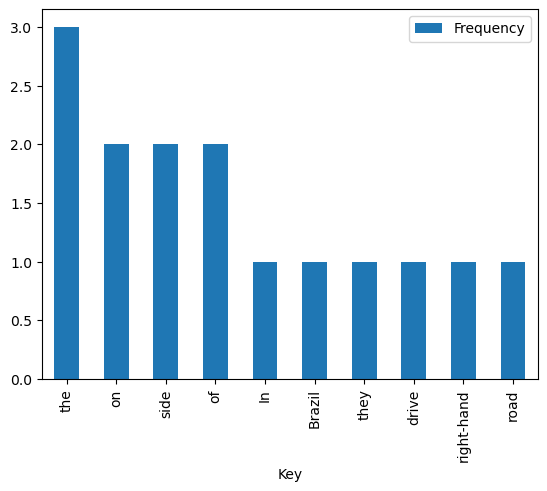

In [5]:

import matplotlib.pyplot as plt
import pandas as pd

df_freq_tokens = pd.DataFrame(fdist1, columns=['Key', 'Frequency']).set_index('Key')

df_freq_tokens.plot(kind='bar')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Membuat satu set berisi stopwords bahasa Inggris (misalnya: 'on', 'in', 'was')
a = set(stopwords.words('english'))

# Teks asli
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."

# Mengubah teks menjadi huruf kecil lalu membaginya menjadi token (kata)
text1 = word_tokenize(text.lower())

# Membuat daftar baru yang hanya berisi kata-kata yang TIDAK ada dalam set stopwords
filtered_words = [x for x in text1 if x not in a]

# Mencetak hasil token sebelum dan sesudah stopwords dibuang
print("Token asli:", text1)
print("Setelah stopwords dibuang:", filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User/nltk_data...


Token asli: ['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
Setelah stopwords dibuang: ['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
# Contoh Stemming di NLTK
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = 'presumably I would like to MultiPly my provision, saying tHat without crYing'
print('Sentence: ',S)

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster', 'Porter', 'Snowball']
for stemmer_name,stem in zip(names,stemmer_list):
    if stemmer_name == 'Snowball':
        st = stem('english')
    else:
        st = stem()
    print(stemmer_name, ': ', '.'.join(st.stem(s) for s in S.split()))
    
# Perhatikan, kita tidak melakukan case normalization (lowercase)
# Hasil stemming bisa tidak bermakna

Sentence:  presumably I would like to MultiPly my provision, saying tHat without crYing
Lancaster :  presum.i.would.lik.to.multiply.my.provision,.say.that.without.cry
Porter :  presum.i.would.like.to.multipli.my.provision,.say.that.without.cri
Snowball :  presum.i.would.like.to.multipli.my.provision,.say.that.without.cri


In [8]:
import nltk
nltk.download('wordnet')  # Download the wordnet resource

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

[nltk_data] Downloading package wordnet to C:\Users\User/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


rocks : rock
corpora : corpus


In [9]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
S = "I am currently learning NLP in English, but if possible I want to know NLP in Indonesia language too"

tokens = word_tokenize(S)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesia', 'NNP'), ('language', 'NN'), ('too', 'RB')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


textblob


In [37]:
pip install textblob

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Note: you may need to restart the kernel to use updated packages.


In [38]:
# Contoh tokenisasi dengan TextBlob
from textblob import TextBlob

T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
sentence_tokens = TextBlob(T).sentences

# Tokenisasi kata
print(TextBlob(T).words)

# Tokenisasi kalimat
print([str(sent) for sent in sentence_tokens])

['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


In [19]:
# Contoh TextBlob Stemming & Lemmatizer
from textblob import Word

# Stemming
print("Stem: ", Word('running').stem())

# Lemmatizer
print("Lemmatize: ", Word('went').lemmatize('v'))

# default Noun, plural akan menjadi singular dari akar katanya
# Juga case sensitive

Stem:  run
Lemmatize:  go


In [40]:
from textblob import TextBlob

# Contoh POS tag dengan TextBlob pada bahasa Inggris
# We need to define the text 'T' to be tagged.
T = "Hello, Mr. Man. He smiled. This i.e. that is it."

for word, pos in TextBlob(T).tags:
    print(word, pos, end=' , ')

Hello NNP , Mr. NNP , Man NNP , He PRP , smiled VBD , This DT , i.e NN , that DT , is VBZ , it PRP , 

sastrawi


In [41]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover() 

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis"
stop = stopword.remove(kalimat.lower())
print(stop)

andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis


In [25]:
# Lemmatizer dengan Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
stemmer = StemmerFactory().create_stemmer()

I = "perayaan itu berbarengan dengan saat kita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakan"))

# Ada beberapa hal yang berbeda antara Sastrawi dan modul-modul diatas.
# Apa sajakah?

raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


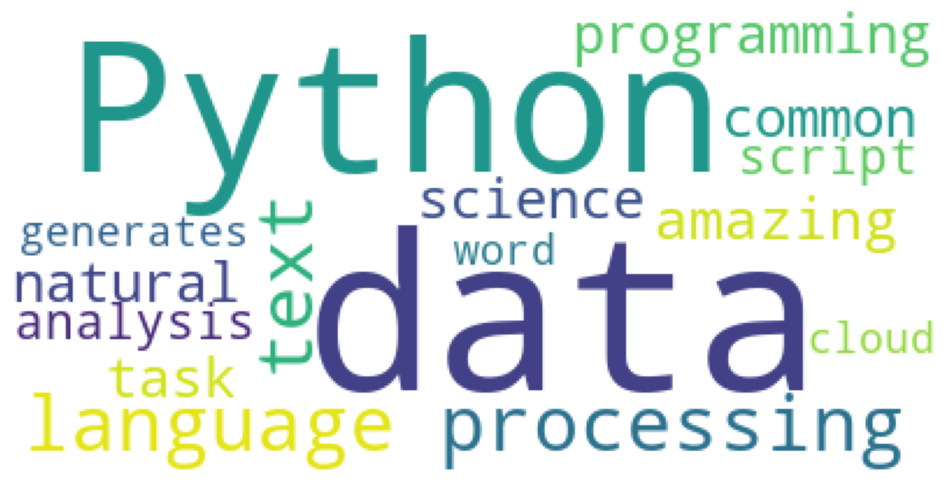

In [27]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# Define the text for the word cloud
string = "Python is an amazing programming language for data science and natural language processing. " \
         "Processing text data is a common task in data analysis. " \
         "This Python script generates a word cloud from text."

wordcloud = WordCloud(background_color="white").generate(string)

# plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# to remove the axis value
plt.axis("off")
plt.show()

clustering

In [ ]:
import pickle
import os
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from types import SimpleNamespace

# --- Setup: Create a dummy data file to make the script runnable ---
# This part simulates the file the original code needs.
dummy_docs = [
    "This is the 1st document.\nIt contains punctuation!! And some stop words.",
    "Here's document number two, with lots of extra    spaces and symbols like #$%.",
    "The third and final document for our test."
]
dummy_labels = [0, 1, 0]

# Create a mock object similar to what the script expects
mock_data_object = SimpleNamespace(data=dummy_docs, target=dummy_labels)

# Create a 'data' directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Save the mock object to a pickle file
with open(os.path.join("data", "20newsgroup.pckl"), "wb") as f:
    pickle.dump(mock_data_object, f)
# --- End of Setup ---


# Original code from the image starts here
stop_words = set(stopwords.words('english'))

src_name = "20newsgroup.pckl"
src_path = os.path.join("data", src_name)
with open(src_path, 'rb') as fin:
    data = pickle.load(fin)

docs = [doc for doc in data.data]
label = data.target

def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = list() # tokenisasi kalimat
    sents = [t for t in sents if t not in stop_words]
    for s in sents:
        s = s.strip().lower() # case folding dan menghilangkan new line
        s = s.replace("\n", " ") # menggantikan \n dengan spasi
        s = re.sub(r'[^a-zA-Z0-9 ]', '', s) # menghapus simbol (adjusted to keep spaces)
        s = re.sub(r'\s+', ' ', s) # menghapus repetitive space
        if s: # Only append if the string is not empty after cleaning
            sents_tok.append(s)
    return " ".join(sents_tok)

docs_clear = list()
for d in docs:
    docs_clear.append(preprocess(d))

print('DONE!')

# Added to show the final result
print("\nOriginal Documents:")
print(docs)
print("\nCleaned Documents:")
print(docs_clear)

DONE!

Original Documents:
['This is the 1st document.\nIt contains punctuation!! And some stop words.', "Here's document number two, with lots of extra    spaces and symbols like #$%.", 'The third and final document for our test.']

Cleaned Documents:
['this 1st document it contains punctuation and stop words', 'here s document number two lots extra spaces symbols like', 'the third final document test']


In [44]:
# representasi vektor dengan VSM-TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)
k = 3
seed = 99 # Sembarang nilai untuk Random generator, mengapa penting? agar ketika dijalankan ulang nilai randomnya tetap sama
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, random_state = seed)
km.fit(X)

# Hasil clusteringnya
C_km = km.predict(X)
C_km[:10]

(3, 20)


array([2, 1, 0])

In [44]:
kmPP = KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state=seed)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)
print(C_kmpp[:10])

[1 2 0]


In [43]:
# DBSCAN
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
import numpy as np

dbscan = cluster.DBSCAN(eps=0.5)
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
C_db[:10]

array([-1, -1, -1])

In [12]:
from sklearn.metrics import silhouette_score as siluet
C = [C_km, C_kmpp, C_db]

for res in C:
    print(siluet(X,res), end=', ')

# NOTE: Silhouette coefficient hanya cocok untuk k-means

0.4435728340790696, 0.4435728340790696, 0.22095546420101125, 

In [15]:
from sklearn.metrics.cluster import homogeneity_score as purity

for res in C:
    print(purity(label,res), end=', ')

0.9822477926204748, 0.8134865132633572, 

In [17]:
# Evaluasi eksternal NMI
from sklearn.metrics import normalized_mutual_info_score as NMI

for res in C:
    print(NMI(label,res), end=', ')

0.982283223361122, 0.753270477070804, 

tugas


no1

In [18]:
import re
def clean_text(text):
    text = re.sub(r"\[.*?\]", "", text)
    text = text.replace("\n", " ")
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [26]:
from bs4 import BeautifulSoup
import requests 

headers = {"User-Agent": "Mozilla/5.0"}
base = "https://id.wikipedia.org"
url = base + "/wiki/Daftar_topik_kalkulus"

soup = BeautifulSoup(requests.get(url, headers=headers).text, "html.parser")

links = [base + a["href"] for a in soup.select("div.mw-parser-output ul li a") 
         if "redlink=1" not in a.get("href", "")][:10]

for i in links:
    print(i)

documents = []

for i, link in enumerate(links, 1):
    s = BeautifulSoup(requests.get(link, headers=headers).text, "html.parser")
    
    for sup in s.find_all("sup", class_="reference"):
        sup.decompose()
    
    paras = [clean_text(p.get_text()) for p in s.find_all("p") if p.get_text().strip()]
    full_text = " ".join(paras)
    documents.append(full_text)

https://id.wikipedia.org/wiki/Teorema_dasar_kalkulus
https://id.wikipedia.org/wiki/Limit_fungsi
https://id.wikipedia.org/wiki/Fungsi_kontinu
https://id.wikipedia.org/wiki/Teorema_nilai_purata
https://id.wikipedia.org/wiki/Teorema_Rolle
https://id.wikipedia.org/wiki/Turunan
https://id.wikipedia.org/wiki/Tabel_turunan
https://id.wikipedia.org/wiki/Diferensial_(matematika)
https://id.wikipedia.org/wiki/Turunan_fungsi
https://id.wikipedia.org/wiki/Diferensial_total


prpo

In [32]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stop_id = set(stopwords.words('indonesian'))

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_id]
    tokens = [stemmer.stem(t) for t in tokens]
    return " ".join(tokens)

clean_docs = [preprocess(doc) for doc in documents]

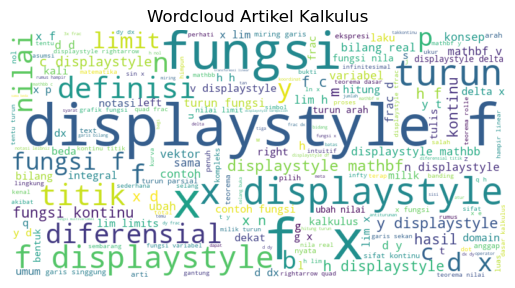

In [45]:
from collections import Counter
all_tokens = " ".join(clean_docs).split()

wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_tokens))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Artikel Kalkulus")
plt.show()

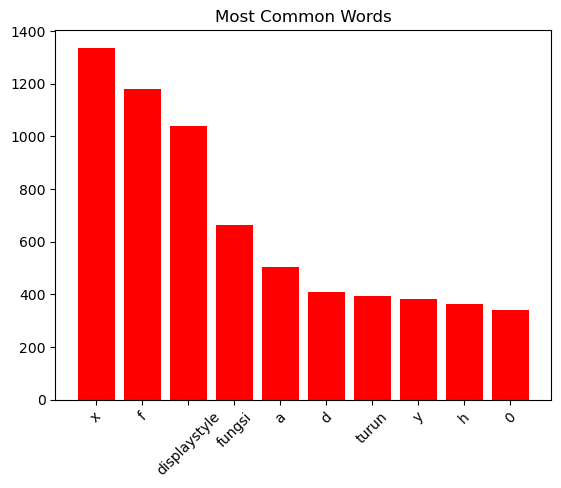

In [ ]:
counts = Counter(all_tokens).most_common(10)
words, freq = zip(*counts)
plt.bar(words, freq, color='red')
plt.xticks(rotation=45)
plt.title("Most Common Words From Calculus Text")
plt.show()